## Jeffery Boczkaja
### DSCI508 Project 6

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('mpg.csv')

In [3]:
print(df.head())

  manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact


## Stacked Histogram

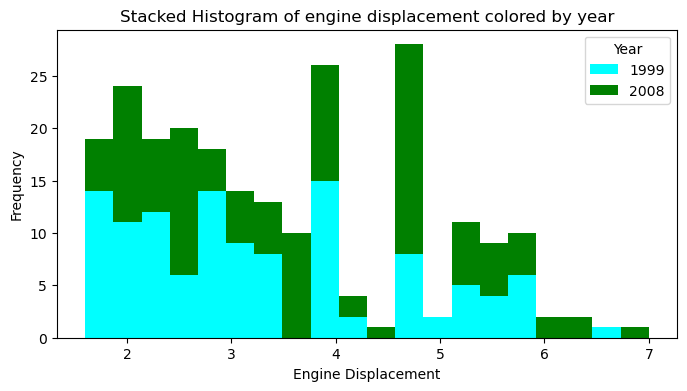

In [4]:
plt.figure(figsize=(8, 4))
plt.hist([df['displ'][df['year'] == year] for year in df['year'].unique()],
         bins=20, stacked=True, label=[str(year) for year in df['year'].unique()],
         color = ['cyan','green'])

plt.xlabel('Engine Displacement')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of engine displacement colored by year')
plt.legend(title='Year')
plt.show()

## Violin Plot

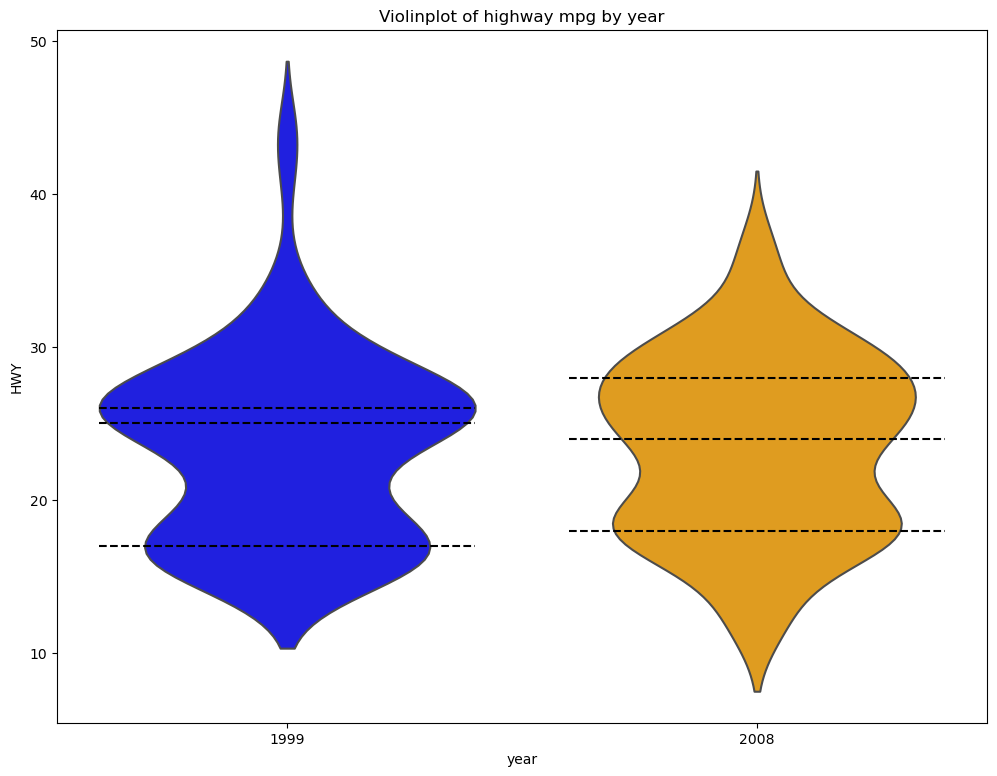

In [5]:
custom_colors = ['blue','orange']

plt.figure(figsize=(12, 9))

sns.violinplot(x='year', y='hwy', data=df, palette=custom_colors, inner=None)

for i, year in enumerate(df['year'].unique()):
    year_data = df['hwy'][df['year'] == year]
    quartiles = np.percentile(year_data, [25, 50, 75])
    plt.hlines(quartiles, i - 0.4, i + 0.4, colors='black', linestyles='dashed')

plt.xlabel('year')
plt.ylabel('HWY')
plt.title('Violinplot of highway mpg by year')

plt.show()

## Scatter Plot

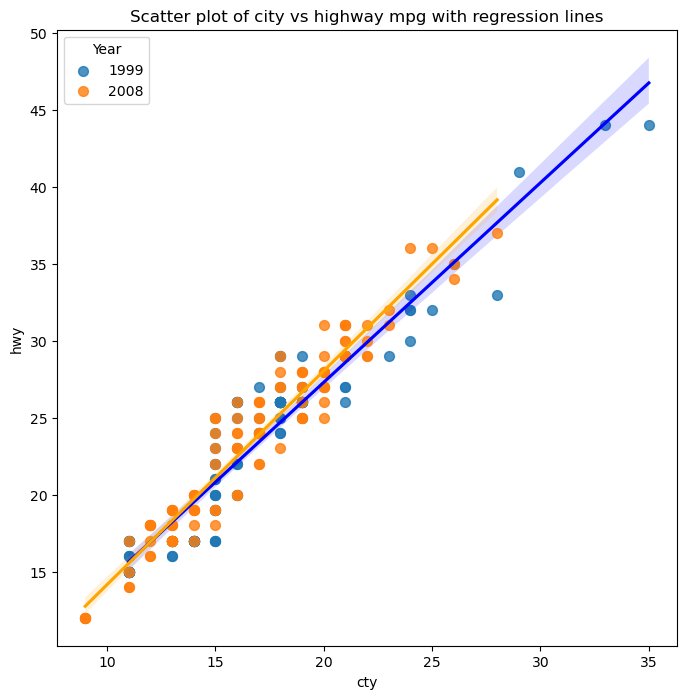

In [6]:
plt.figure(figsize=(8, 8))

sns.regplot(x='cty', y='hwy', data=df[df['year'] == 1999], scatter_kws={'s': 50}, line_kws={'color': 'blue'}, label='1999')
sns.regplot(x='cty', y='hwy', data=df[df['year'] == 2008], scatter_kws={'s': 50}, line_kws={'color': 'orange'}, label='2008')

plt.xlabel('cty')
plt.ylabel('hwy')
plt.title('Scatter plot of city vs highway mpg with regression lines')
plt.legend(title='Year')

plt.show()